# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
accre_df=pd.read_csv("./data/fullsample.csv")

# Inspect the Data

In [3]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06


In [4]:
accre_df.tail()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
4365374,12741062_145,mickey,boyce,4096Mc,462.90M,00:10:00,00:01:44,1,1,production,0:0,2019-09-25T14:22:03
4365375,12741062_146,mickey,boyce,4096Mc,462.89M,00:10:00,00:01:44,1,1,production,0:0,2019-09-25T14:22:03
4365376,12741062_147,mickey,boyce,4096Mc,553.77M,00:10:00,00:01:53,1,1,production,0:0,2019-09-25T14:22:03
4365377,12741062_148,mickey,boyce,4096Mc,557.09M,00:10:00,00:01:52,1,1,production,0:0,2019-09-25T14:22:03
4365378,12741062_149,mickey,boyce,4096Mc,616.77M,00:10:00,00:01:52,1,1,production,0:0,2019-09-25T14:22:03


# Cleaning the data

In [5]:
accre_df=accre_df.query('PARTITION=="production"')
accre_df=accre_df.drop_duplicates(subset="JOBID")
#make all column names lower case
accre_df.columns=accre_df.columns.str.lower()
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319257 entries, 0 to 4365378
Data columns (total 12 columns):
jobid        object
account      object
user         object
reqmem       object
usedmem      object
reqtime      object
usedtime     object
nodes        int64
cpus         int64
partition    object
exitcode     object
submit       object
dtypes: int64(2), object(10)
memory usage: 329.2+ MB


In [6]:
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06


Job time is in a format of either d-hh:mm:ss or hh:mm:ss, it needs to be converted
 to total seconds

In [7]:
accre_df['mem_type']=accre_df.reqmem.str[-2:]

In [8]:
accre_df['mem_num']=accre_df.reqmem.str[:-2]

In [9]:
accre_df['used_mem']=accre_df.usedmem.str[:-1]

In [10]:
accre_df['cpu_per_node']=accre_df['cpus']/accre_df['nodes']

In [11]:
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_mem,cpu_per_node
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12,16.0
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10,1.0
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09,1.0
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82,1.0
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03,1.0


In [12]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319257 entries, 0 to 4365378
Data columns (total 16 columns):
jobid           object
account         object
user            object
reqmem          object
usedmem         object
reqtime         object
usedtime        object
nodes           int64
cpus            int64
partition       object
exitcode        object
submit          object
mem_type        object
mem_num         object
used_mem        object
cpu_per_node    float64
dtypes: float64(1), int64(2), object(13)
memory usage: 430.5+ MB


In [13]:
accre_df["mem_num"]=pd.to_numeric(accre_df["mem_num"])
accre_df["used_mem"]=pd.to_numeric(accre_df["used_mem"])

In [14]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319257 entries, 0 to 4365378
Data columns (total 16 columns):
jobid           object
account         object
user            object
reqmem          object
usedmem         object
reqtime         object
usedtime        object
nodes           int64
cpus            int64
partition       object
exitcode        object
submit          object
mem_type        object
mem_num         int64
used_mem        float64
cpu_per_node    float64
dtypes: float64(2), int64(3), object(11)
memory usage: 430.5+ MB


In [15]:
#usedmem_per_cpu- column for usedmem/cpu_per_node
accre_df["usedmem_per_cpu"]=accre_df["used_mem"]/accre_df["cpu_per_node"]

In [16]:
accre_exit_df=accre_df.query('exitcode=="0:0"')

In [17]:
accre_exit_df.tail()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_mem,cpu_per_node,usedmem_per_cpu
4365374,12741062_145,mickey,boyce,4096Mc,462.90M,00:10:00,00:01:44,1,1,production,0:0,2019-09-25T14:22:03,Mc,4096,462.90,1.0,462.90
4365375,12741062_146,mickey,boyce,4096Mc,462.89M,00:10:00,00:01:44,1,1,production,0:0,2019-09-25T14:22:03,Mc,4096,462.89,1.0,462.89
4365376,12741062_147,mickey,boyce,4096Mc,553.77M,00:10:00,00:01:53,1,1,production,0:0,2019-09-25T14:22:03,Mc,4096,553.77,1.0,553.77
4365377,12741062_148,mickey,boyce,4096Mc,557.09M,00:10:00,00:01:52,1,1,production,0:0,2019-09-25T14:22:03,Mc,4096,557.09,1.0,557.09
4365378,12741062_149,mickey,boyce,4096Mc,616.77M,00:10:00,00:01:52,1,1,production,0:0,2019-09-25T14:22:03,Mc,4096,616.77,1.0,616.77


In [18]:
#define reqmem_per_cpu
def conversion (row):
    if row['mem_type'] == "Mn":
        gg= row['mem_num']/row['cpu_per_node']
        return gg
    else:
        return row['mem_num']

accre_df["reqmem_per_cpu"]=accre_df.apply(conversion,axis=1)

#This wont work, because we are doing calculations by rows
def conversion (row):
    if row['mem_type'] == "Mn":
        gg= row['mem_num']/row['cpu_per_node']
        return gg
    else:
        return row['mem_num']

accre_df["reqmem_per_cpu"]=accre_df.reqmem_per_cpu.apply(conversion)

In [19]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319257 entries, 0 to 4365378
Data columns (total 18 columns):
jobid              object
account            object
user               object
reqmem             object
usedmem            object
reqtime            object
usedtime           object
nodes              int64
cpus               int64
partition          object
exitcode           object
submit             object
mem_type           object
mem_num            int64
used_mem           float64
cpu_per_node       float64
usedmem_per_cpu    float64
reqmem_per_cpu     float64
dtypes: float64(4), int64(3), object(11)
memory usage: 481.2+ MB


Job time is in a format of either d-hh:mm:ss or hh:mm:ss, it needs to be converted
    to total seconds

In [20]:
accre_dfk=accre_df[:1000]
accre_dfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1235
Data columns (total 18 columns):
jobid              1000 non-null object
account            1000 non-null object
user               1000 non-null object
reqmem             1000 non-null object
usedmem            1000 non-null object
reqtime            1000 non-null object
usedtime           1000 non-null object
nodes              1000 non-null int64
cpus               1000 non-null int64
partition          1000 non-null object
exitcode           1000 non-null object
submit             1000 non-null object
mem_type           1000 non-null object
mem_num            1000 non-null int64
used_mem           1000 non-null float64
cpu_per_node       1000 non-null float64
usedmem_per_cpu    1000 non-null float64
reqmem_per_cpu     1000 non-null float64
dtypes: float64(4), int64(3), object(11)
memory usage: 148.4+ KB


from datetime import datetime
from datetime import date
import time

def convertTime(x):
    if x == "00-00:00:00":
        time = x.replace("-",":" )
        x = datetime.datetime.strptime('00:00:00:00','%j:%H:%M:%S')
        return int(datetime.timedelta(day=x.tm_day,hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
    else:
        return int (datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
    
accre_dfk['test']=accre_dfk.usedtime.apply(convertTime)

def convertTime(x):
    if x == "00-00:00:00":
        time = x.replace("-",":" )
        x = datetime.datetime.strptime('00:00:00:00','%j:%H:%M:%S')
        return int(datetime.timedelta(day=x.tm_day,hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
    else:
        return int (datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
    
accre_dfk['test']=accre_dfk.usedtime.apply(convertTime)

import datetime
import time
def converttime(x):
    if x == "00-00:00:00":
        time = x.replace("-",":" )
        x = datetime.datetime.strptime('00:00:00:00'.split(':')[0],'%j:%H:%M:%S')
        return int(datetime.timedeltaindex(day=x.tm_day,hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())


accre_dfk["test"]=accre_dfk.reqtime.apply(converttime)

In [21]:
def time_to_second(sec):
   time = sec.split('-')
   if len(time) == 2:
       day = int(time[0]) * 86400
   else:
       day = 0
   h, m, s = time[-1].split(':')
   day = day+int(h) * 3600
   day = day +int(m)*60
   day = day+ int(s)
   return day



In [22]:
accre_df["usedtime_sec"]=accre_df.usedtime.apply(time_to_second)

In [23]:
accre_df["reqtime_sec"]=accre_df.reqtime.apply(time_to_second)

You may also want to start by only looking at jobs that ran on one node.

In [24]:
accre_dfnode= accre_df.query('nodes == "1"')
accre_dfnode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315218 entries, 0 to 4365378
Data columns (total 20 columns):
jobid              object
account            object
user               object
reqmem             object
usedmem            object
reqtime            object
usedtime           object
nodes              int64
cpus               int64
partition          object
exitcode           object
submit             object
mem_type           object
mem_num            int64
used_mem           float64
cpu_per_node       float64
usedmem_per_cpu    float64
reqmem_per_cpu     float64
usedtime_sec       int64
reqtime_sec        int64
dtypes: float64(4), int64(5), object(11)
memory usage: 531.2+ MB


Lot of small jobs submitted together as an array (less difficult)

#accre_dfnodek is accre_df dataset with the first 1000 rows
accre_dfnodek = accre_dfnode[:1000]
accre_dfnodek.head()

In [25]:
accre_dfnode['jobid_array']=accre_dfnode.jobid.apply(lambda arr: arr.split('_')[0])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
accre_dfnode.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,submit,mem_type,mem_num,used_mem,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec,jobid_array
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,...,2019-03-09T16:38:44,Mn,247808,115217.12,16.0,7201.07,15488.0,955970,1209600,6794220
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,...,2019-03-07T18:39:59,Mn,12288,6516.10,1.0,6516.10,12288.0,1070801,1188000,6983193
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,...,2019-03-11T10:06:06,Mn,12288,0.09,1.0,0.09,12288.0,1153656,1188000,7055502
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,...,2019-03-11T10:06:06,Mn,12288,8333.82,1.0,8333.82,12288.0,1050659,1188000,7055502
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,...,2019-03-11T10:06:06,Mn,12288,8304.03,1.0,8304.03,12288.0,981826,1188000,7055502


We strongly discourage users from running large numbers (>500) of very short ( < 5 mins)
    jobs within 4 hours. Are there any users who are repeat offenders? or 
    Lot of small jobs submitted together as an array

In [27]:
accre_node_short=accre_dfnode[accre_dfnode['usedtime_sec']<300]
accre_short=accre_node_short.groupby(['user','jobid_array']).count()

In [28]:
accre_short.head()
accre_short=pd.DataFrame(data=accre_short)
accre_short=accre_short.reset_index()

In [29]:
accre_short=accre_short[accre_short['jobid'] > 500]
accre_short=accre_short.sort_values(by="jobid", ascending=False)
accre_short.head()
accre_short_top=accre_short.query('user == "whitley" or user== "demarcus" or user == "boyce" or user=="benson" or user=="baylee"')
#accre_short_top.info()
#accre_short_top.head(20)

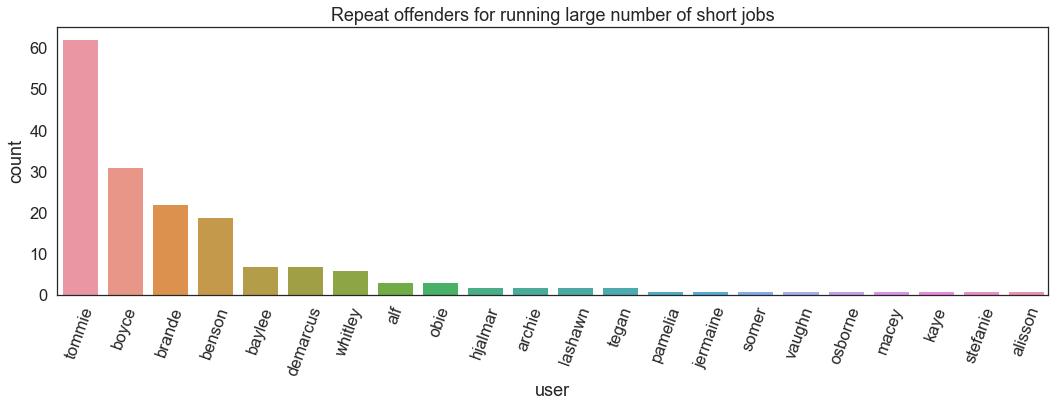

In [30]:
plt.figure(figsize=(15,6))
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white", font_scale=1.5)
all=sns.countplot(data=accre_short, x='user', order=accre_short['user'].value_counts().index)
plt.xticks(rotation=70)
plt.title("Repeat offenders for running large number of short jobs")
plt.tight_layout()
plt.savefig('offender.png')

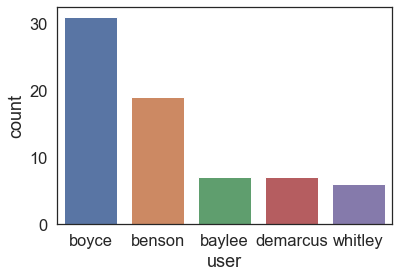

In [31]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white", font_scale=1.5)
s=sns.countplot(data=accre_short_top, x="user", order=accre_short_top['user'].value_counts().index)

In [32]:
accre_short_usr4=accre_short.query('user == "whitley"')
accre_short_usr4.head()

,user,jobid_array,jobid,account,reqmem,usedmem,reqtime,usedtime,nodes,cpus,...,exitcode,submit,mem_type,mem_num,used_mem,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec
143246,whitley,11263403,17061,17061,17061,17061,17061,17061,17061,17061,...,17061,17061,17061,17061,17061,17061,17061,17061,17061,17061
143248,whitley,11411414,13476,13476,13476,13476,13476,13476,13476,13476,...,13476,13476,13476,13476,13440,13476,13440,13476,13476,13476
143245,whitley,11148467,11749,11749,11749,11749,11749,11749,11749,11749,...,11749,11749,11749,11749,11476,11749,11476,11749,11749,11749
143249,whitley,11411709,7584,7584,7584,7584,7584,7584,7584,7584,...,7584,7584,7584,7584,7581,7584,7581,7584,7584,7584
143247,whitley,11376566,4318,4318,4318,4318,4318,4318,4318,4318,...,4318,4318,4318,4318,4003,4318,4003,4318,4318,4318


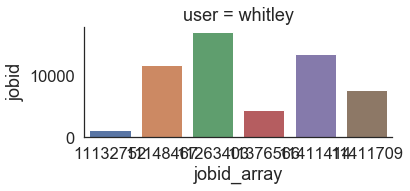

In [33]:

g = sns.catplot(x="jobid_array", y="jobid", row="user", data=accre_short_usr4, kind="bar", height=3, aspect=2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

<Figure size 18000x720 with 0 Axes>

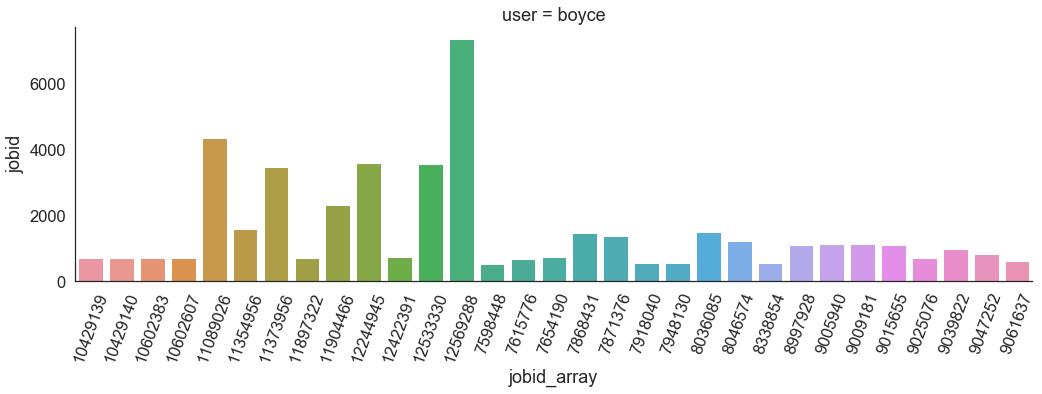

In [34]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white", font_scale=1.5)
plt.figure(figsize=(250,10))
accre_short_usr1=accre_short.query('user == "boyce"')
g = sns.catplot(x="jobid_array", y="jobid", row="user", data=accre_short_usr1, kind="bar", height=5, aspect=3)
plt.xticks(rotation=70)

We strongly discourage users from running large numbers (>500) of very short ( < 5 mins)
    jobs within 4 hours. Are there any users who are repeat offenders?

Lots of small jobs submitted together within a 4-hour window,
regardless of whether or not they were in an array (hard mode)

Are any of these short jobs failing, i.e. exit code not "0:0"? If large arrays of
    jobs are failing quickly, it indicates that users are not debugging their jobs well
    before large scale submissions.

In [35]:
accre_node_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822038 entries, 1962 to 4365378
Data columns (total 21 columns):
jobid              822038 non-null object
account            822038 non-null object
user               822038 non-null object
reqmem             822038 non-null object
usedmem            822038 non-null object
reqtime            822038 non-null object
usedtime           822038 non-null object
nodes              822038 non-null int64
cpus               822038 non-null int64
partition          822038 non-null object
exitcode           822038 non-null object
submit             822038 non-null object
mem_type           822038 non-null object
mem_num            822038 non-null int64
used_mem           632973 non-null float64
cpu_per_node       822038 non-null float64
usedmem_per_cpu    632973 non-null float64
reqmem_per_cpu     822038 non-null float64
usedtime_sec       822038 non-null int64
reqtime_sec        822038 non-null int64
jobid_array        822038 non-null object
dtyp

In [36]:
accre_short_exit=accre_node_short.query('exitcode!="0:0"')
accre_short_exit.count()
accre_short_exit=accre_short_exit.sort_values('user', ascending=True)
accre_short_exitusr1=accre_short_exit.query('user=="belia"')
accre_short_exit.iloc[[1],[10]]
accre_short_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1159600 to 689790
Data columns (total 21 columns):
jobid              35 non-null object
account            35 non-null object
user               35 non-null object
reqmem             35 non-null object
usedmem            35 non-null object
reqtime            35 non-null object
usedtime           35 non-null object
nodes              35 non-null int64
cpus               35 non-null int64
partition          35 non-null object
exitcode           35 non-null object
submit             35 non-null object
mem_type           35 non-null object
mem_num            35 non-null int64
used_mem           33 non-null float64
cpu_per_node       35 non-null float64
usedmem_per_cpu    33 non-null float64
reqmem_per_cpu     35 non-null float64
usedtime_sec       35 non-null int64
reqtime_sec        35 non-null int64
jobid_array        35 non-null object
dtypes: float64(4), int64(5), object(12)
memory usage: 6.0+ KB


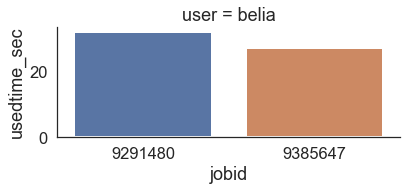

In [37]:
exitz = sns.catplot(x="jobid", y="usedtime_sec", row="user", data=accre_short_exitusr1, kind="bar", linewidth=2, height=3, aspect=2)

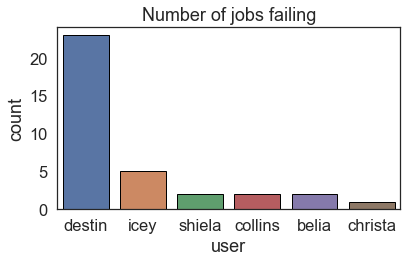

In [38]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white",font_scale=1.5)
plt.title('Number of jobs failing')
ex=sns.countplot(data=accre_short_exit, x='user', edgecolor=(0,0,0), order=accre_short_exit['user'].value_counts().index)
plt.tight_layout()
plt.savefig('exitcode.png')

What groups are best optimizing their memory usage in terms of percent of actual
    memory used of the memory requested for a job? What is the average percent for each group?

In [39]:
accre_dfnode.head()
accre_dfnode.loc[accre_dfnode.account=="blood"]

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,submit,mem_type,mem_num,used_mem,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec,jobid_array
271230,7737740,blood,jonnie,1024Mc,516.71M,00:30:00,00:00:39,1,1,production,...,2019-04-12T12:53:42,Mc,1024,516.71,1.0,516.71,1024.0,39,1800,7737740
272935,7742321,blood,jonnie,1024Mc,3363.05M,00:30:00,00:13:16,1,1,production,...,2019-04-12T14:57:56,Mc,1024,3363.05,1.0,3363.05,1024.0,796,1800,7742321


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 432x432 with 0 Axes>

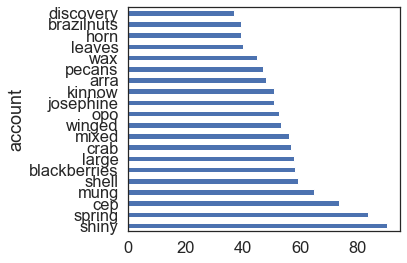

In [40]:

accre_dfnode['actual_mem_pct']=(accre_dfnode['usedmem_per_cpu']/accre_dfnode['reqmem_per_cpu'])*100

accre_memory=accre_dfnode.groupby(["account"]).actual_mem_pct.mean()
accre_memory=pd.DataFrame(data=accre_memory)
accre_memory=accre_memory.reset_index()
accre_memory=accre_memory.sort_values(by='actual_mem_pct', ascending=False)
accre_memory=accre_memory.drop([12] , axis=0)
ax=plt.figure(figsize=(6,6))
#axes=ax.add_axes([0.1,0.1,0.8,0.8])
accre_memory[:20].plot(kind='barh', x='account', legend=False)
#mem = sns.catplot(x="actual_mem_pct", y="account", data=accre_memory, kind="barh", height=5, aspect=3)



plt.tight_layout()
plt.savefig('actualmem.png')
#exitz = sns.catplot(x="jobid", y="usedtime_sec", row="user", data=accre_short_exitusr1, kind="bar", linewidth=2, height=3, aspect=2)
#plt.figure(figsize=(100, 100))
#plt.xticks(rotation=85)


In [41]:
accre_memory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 90 to 99
Data columns (total 2 columns):
account           110 non-null object
actual_mem_pct    107 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Optimizing memory is more important for longer running jobs then shorter running
    jobs as the resources are tied up for longer. If jobs are weighted by runtime,
    what is the average percent of memory used of the requested memory for each group?

In [42]:
accre_dfnode.head()
accre_dfnode['total'] = accre_dfnode['actual_mem']*accre_dfnode['usedtime_sec']
acc = accre_dfnode.groupby('account')['usedtime_sec'].sum()
acc = acc.reset_index()
acc2 = accre_dfnode.groupby('account')['total'].sum()
#accre_dfnode.head()
acc2 = acc2.reset_index()
total_acc = pd.merge(acc, acc2, on='account')
total_acc.head()
total_acc['weight_avg'] = (total_acc['total']/total_acc['usedtime_sec'])*100
total_acc.head()
total_acc = total_acc[total_acc.account != 'blood']
top10 = total_acc.nlargest(20, 'weight_avg')
ax = plt.figure(figsize=(10, 8))
axes= ax.add_axes([0.1,0.1,0.8,0.8])
top10.plot(kind='bar',x='account', y='weight_avg', color=['cyan', 'blue', 'black', 'grey', 'purple', 'lightgreen', 'orange', 'dodgerblue', 'green', 'darkblue'], ax=axes)
plt.ylabel('Weight Average Percentage')
plt.xlabel('Account Group')
plt.xticks(rotation=90)
# top10 = total_acc.nsmallest(10, 'weight_avg')
# top10.plot(kind='bar',x='account', y='weight_avg', color=['cyan', 'blue', 'black', 'grey', 'purple', 'lightgreen', 'orange', 'dodgerblue', 'green', 'darkblue'])
# plt.ylabel('Weight Average Percentage')
# plt.xlabel('Account Group')
# plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig('top10_memory.png', dpi = 250);

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec,jobid_array,actual_mem_pct,totalusetime,wtusedtime,wtrun_mem
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,...,16.0,7201.070,15488.0,955970,1209600,6794220,46.494512,158540095,0.006030,2.803541e-03
1,7241341,laxtons,mina,15360Mn,1.16M,14-00:00:00,12-07:09:33,1,1,production,...,1.0,1.160,15360.0,1062573,1209600,7241341,0.007552,158540095,0.006702,5.061584e-07
2,7264927_6,laxtons,hazel,82159Mn,2.80M,03:00:00,00:02:51,1,5,production,...,5.0,0.560,16431.8,171,10800,7264927,0.003408,158540095,0.000001,3.675868e-11
3,7264927_1,laxtons,hazel,82159Mn,4.05M,03:00:00,00:04:26,1,5,production,...,5.0,0.810,16431.8,266,10800,7264927,0.004929,158540095,0.000002,8.270703e-11
4,7264927_2,laxtons,hazel,82159Mn,2.86M,03:00:00,00:03:12,1,5,production,...,5.0,0.572,16431.8,192,10800,7264927,0.003481,158540095,0.000001,4.215732e-11
